In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from scipy.signal import filtfilt
from scipy import signal

import numpy as np


In [37]:
data_raw_df = pd.read_csv("./dataset_sub1/physiologica_lsub_2.csv")
anno_raw_df = pd.read_csv("./dataset_sub1/processed_annotation/sub_2_processed.csv")
data_df = pd.DataFrame(data_raw_df,columns=["gsr","emg_zygo","emg_coru","emg_trap","bvp"])
anno_df = pd.DataFrame(anno_raw_df,columns=["valence","arousal","video","emo"])

raw_gsr_df = pd.DataFrame(data_raw_df,columns=["gsr"]).head(1688)
test_raw_gsr_df = pd.read_csv("./dataset_sub1/gsr_test.csv")
test_gsr_df = pd.DataFrame(test_raw_gsr_df,columns=["absus"])

          absus
0     47.896750
1      0.097466
2      0.000000
3      0.048780
4      0.048780
...         ...
1683  33.797054
1684  33.523654
1685  33.387622
1686  32.714055
1687  31.789137

[1688 rows x 1 columns]


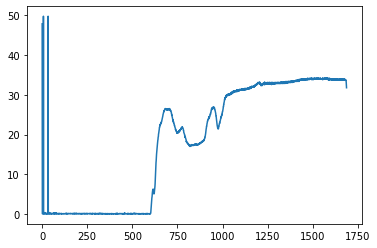

In [15]:
print(test_gsr_df)
plt.plot(test_gsr_df)

In [17]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns.values.tolist():
        mean_value = df[feature_name].mean()
        std_value = df[feature_name].std()
        result[feature_name] = (df[feature_name] - mean_value) / (std_value)
    return result

Text(0.5, 0, 'gsr')

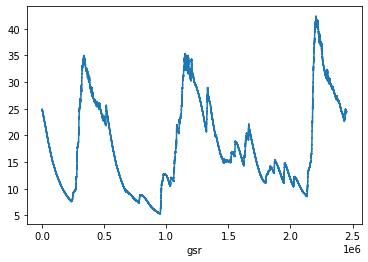

In [18]:
plt.plot(data_df["gsr"])
plt.xlabel("gsr")

Text(0.5, 0, 'emg_coru')

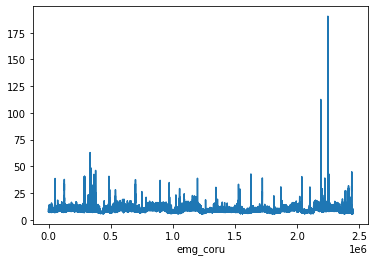

In [19]:
plt.plot(data_df["emg_coru"])
plt.xlabel("emg_coru")

Text(0.5, 0, 'gsr_filtered')

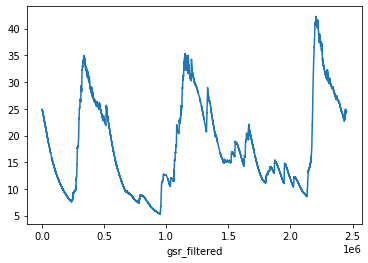

In [20]:
# filtering
# first-order butterworth
fs = 1000
fc = 50
Wn = fc/(fs/2)
order = 1
b, a = signal.butter(order, Wn, 'low')
data_filtered = pd.DataFrame(index=data_df.index,columns=data_df.columns)
for i in range(data_df.shape[1]):
    data_filtered.iloc[:,i] = filtfilt(b, a, data_df.iloc[:,i])

plt.plot(data_filtered["gsr"])
plt.xlabel("gsr_filtered")

Text(0, 0.5, 'valence')

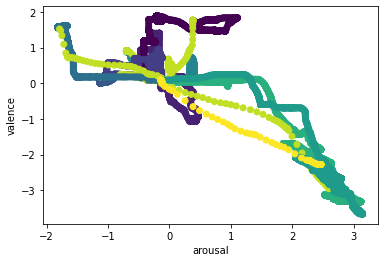

In [21]:
normalized_anno_df = normalize(anno_df)

# valence: degree of being pleasant arousal:degree of excitedness

plt.scatter(normalized_anno_df["arousal"],normalized_anno_df["valence"],label='valence',c = anno_df["video"])
plt.xlabel("arousal")
plt.ylabel("valence")

In [22]:
# define the windows size 50ms in raw data, sampling frequency = 1000Hz
n =50 # ms
N = int(data_filtered.shape[0]/n) # number of data 

In [40]:
# group the data
data_to_analysis = pd.DataFrame(data_filtered,columns=["gsr","emg_zygo","emg_coru","emg_trap","bvp"])# eliminate the time column
raw_data_grouped = data_to_analysis.groupby(lambda x: math.floor(x/n))
# group the annotation 
anno_to_analysis = pd.DataFrame(anno_raw_df,columns=["valence","arousal","emo"])
anno_grouped = anno_to_analysis.groupby(lambda x: math.floor(x/(n/50)))
anno_df = anno_grouped.mean()
#print(N,anno_df.shape[0])

test_gsr_df = normalize(test_gsr_df)
gsr_test_grouped = test_gsr_df.groupby(lambda x: math.floor(x/n))
gsr_test_mean = gsr_test_grouped.mean()

raw_gsr_df = normalize(raw_gsr_df)
raw_gsr_grouped = raw_gsr_df.groupby(lambda x: math.floor(x/n))
raw_gsr_mean = gsr_test_grouped.mean()
print(raw_gsr_mean.shape[0])


34


# Feature Extraction

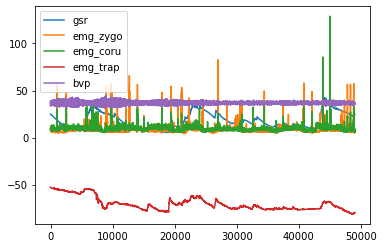

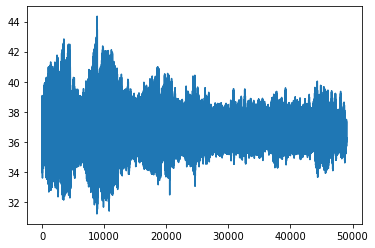

gsr valence
r = -0.587，p =  0.000
gsr arousal
r =  0.627，p =  0.000
gsr emo
r = -0.035，p =  0.000
emg_zygo valence
r =  0.004，p =  0.391
emg_zygo arousal
r =  0.048，p =  0.000
emg_zygo emo
r =  0.019，p =  0.000
emg_coru valence
r = -0.172，p =  0.000
emg_coru arousal
r =  0.137，p =  0.000
emg_coru emo
r =  0.277，p =  0.000
emg_trap valence
r = -0.174，p =  0.000
emg_trap arousal
r =  0.155，p =  0.000
emg_trap emo
r =  0.064，p =  0.000
bvp valence
r = -0.012，p =  0.008
bvp arousal
r =  0.005，p =  0.311
bvp emo
r =  0.008，p =  0.067


In [13]:
# Look at the mean
data_mean = raw_data_grouped.mean()

data_mean.plot()
plt.show()
plt.plot(data_mean['bvp'])
plt.show()
# linear correlation analysis
for phys_name in data_mean.columns.values.tolist():
    for anno_name in anno_df.columns.values.tolist():
        x = data_mean[phys_name]
        y = anno_df[anno_name]
        print(phys_name,anno_name)
        # pearson
        r,p = stats.pearsonr(x,y)  #
        print('r = %6.3f，p = %6.3f'%(r,p)) # if|r|<0.3 they are not linear correlated
#         # spearman
#         rho, pval = stats.spearmanr(x, y)
#         print('rho = %6.3f，pval = %6.3f'%(rho,pval))
#         # kendall 
#         tau, p_value = stats.kendalltau(x,y)
#         print('tau = %6.3f，p_value = %6.3f'%(tau,p_value))

gsr valence
r = -0.587，p =  0.000
gsr arousal
r =  0.627，p =  0.000
gsr emo
r = -0.035，p =  0.000
emg_zygo valence
r =  0.004，p =  0.372
emg_zygo arousal
r =  0.048，p =  0.000
emg_zygo emo
r =  0.019，p =  0.000
emg_coru valence
r = -0.170，p =  0.000
emg_coru arousal
r =  0.136，p =  0.000
emg_coru emo
r =  0.275，p =  0.000
emg_trap valence
r = -0.174，p =  0.000
emg_trap arousal
r =  0.155，p =  0.000
emg_trap emo
r =  0.064，p =  0.000
bvp valence
r = -0.012，p =  0.009
bvp arousal
r =  0.005，p =  0.319
bvp emo
r =  0.008，p =  0.075


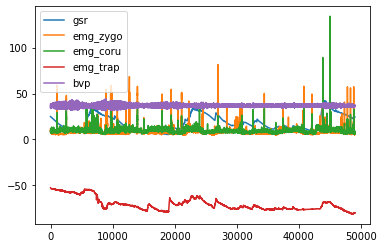

In [14]:
# the median
data_median = raw_data_grouped.median()
data_median.plot()
for phys_name in data_median.columns.values.tolist():
    for anno_name in anno_df.columns.values.tolist():
        x = data_median[phys_name]
        y = anno_df[anno_name]
        print(phys_name,anno_name)
        # pearson
        r,p = stats.pearsonr(x,y)  #
        print('r = %6.3f，p = %6.3f'%(r,p)) # if|r|<0.3 they are not linear correlated

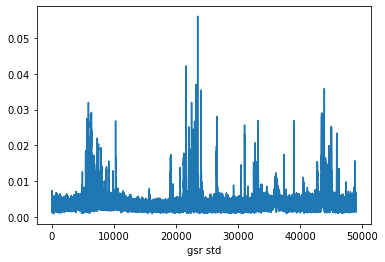

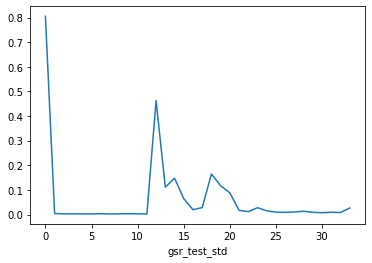

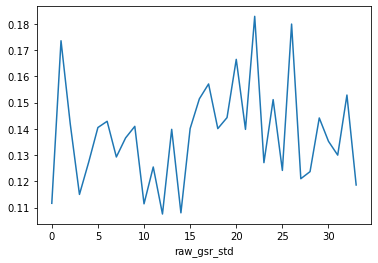

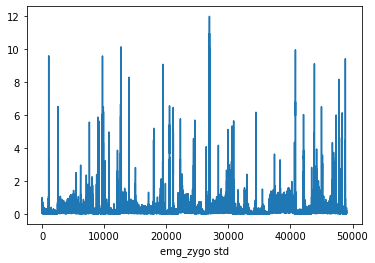

gsr valence
r = -0.254，p =  0.000
gsr arousal
r =  0.291，p =  0.000
gsr emo
r =  0.046，p =  0.000
emg_zygo valence
r =  0.004，p =  0.378
emg_zygo arousal
r =  0.032，p =  0.000
emg_zygo emo
r = -0.005，p =  0.251
emg_coru valence
r = -0.133，p =  0.000
emg_coru arousal
r =  0.109，p =  0.000
emg_coru emo
r =  0.138，p =  0.000
emg_trap valence
r = -0.041，p =  0.000
emg_trap arousal
r = -0.019，p =  0.000
emg_trap emo
r = -0.012，p =  0.010
bvp valence
r = -0.020，p =  0.000
bvp arousal
r = -0.016，p =  0.000
bvp emo
r = -0.028，p =  0.000


In [41]:
# the std
data_std = raw_data_grouped.std()
plt.plot(data_std["gsr"])
plt.xlabel("gsr std")
plt.show()

gsr_test_std = gsr_test_grouped.std()
plt.plot(gsr_test_std)
plt.xlabel("gsr_test_std")
plt.show()

raw_gsr_std = raw_gsr_grouped.std()
plt.plot(raw_gsr_std)
plt.xlabel("raw_gsr_std")

plt.show()
plt.plot(data_std["emg_zygo"])
plt.xlabel("emg_zygo std")
plt.show()

for phys_name in data_std.columns.values.tolist():
    for anno_name in anno_df.columns.values.tolist():
        x = data_std[phys_name]
        y = anno_df[anno_name]
        print(phys_name,anno_name)
        # pearson
        r,p = stats.pearsonr(x,y)  #
        print('r = %6.3f，p = %6.3f'%(r,p)) # if|r|<0.3 they are not linear correlated

gsr valence
r = -0.587，p =  0.000
gsr arousal
r =  0.627，p =  0.000
gsr emo
r = -0.035，p =  0.000
emg_zygo valence
r =  0.003，p =  0.475
emg_zygo arousal
r =  0.050，p =  0.000
emg_zygo emo
r =  0.025，p =  0.000
emg_coru valence
r = -0.168，p =  0.000
emg_coru arousal
r =  0.132，p =  0.000
emg_coru emo
r =  0.297，p =  0.000
emg_trap valence
r = -0.174，p =  0.000
emg_trap arousal
r =  0.156，p =  0.000
emg_trap emo
r =  0.065，p =  0.000
bvp valence
r = -0.008，p =  0.091
bvp arousal
r =  0.009，p =  0.058
bvp emo
r =  0.015，p =  0.001


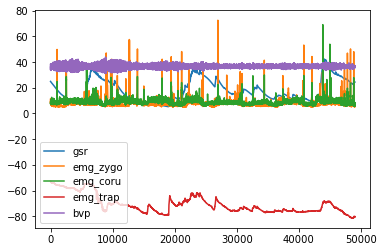

In [16]:
# the min
data_min = raw_data_grouped.min()
data_min.plot()
for phys_name in data_min.columns.values.tolist():
    for anno_name in anno_df.columns.values.tolist():
        x = data_min[phys_name]
        y = anno_df[anno_name]
        print(phys_name,anno_name)
        # pearson
        r,p = stats.pearsonr(x,y)  #
        print('r = %6.3f，p = %6.3f'%(r,p)) # if|r|<0.3 they are not linear correlated

gsr valence
r = -0.588，p =  0.000
gsr arousal
r =  0.627，p =  0.000
gsr emo
r = -0.035，p =  0.000
emg_zygo valence
r =  0.004，p =  0.424
emg_zygo arousal
r =  0.047，p =  0.000
emg_zygo emo
r =  0.015，p =  0.001
emg_coru valence
r = -0.175，p =  0.000
emg_coru arousal
r =  0.140，p =  0.000
emg_coru emo
r =  0.258，p =  0.000
emg_trap valence
r = -0.173，p =  0.000
emg_trap arousal
r =  0.153，p =  0.000
emg_trap emo
r =  0.063，p =  0.000
bvp valence
r = -0.016，p =  0.000
bvp arousal
r =  0.001，p =  0.764
bvp emo
r =  0.002，p =  0.684


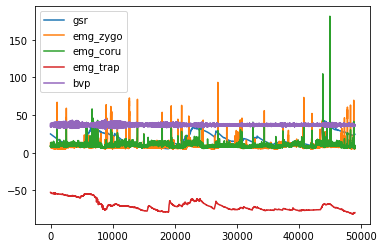

In [17]:
# the max
data_max = raw_data_grouped.max()
data_max.plot()
for phys_name in data_max.columns.values.tolist():
    for anno_name in anno_df.columns.values.tolist():
        x = data_max[phys_name]
        y = anno_df[anno_name]
        print(phys_name,anno_name)
        # pearson
        r,p = stats.pearsonr(x,y)  #
        print('r = %6.3f，p = %6.3f'%(r,p)) # if|r|<0.3 they are not linear correlated

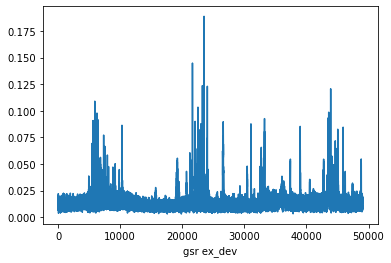

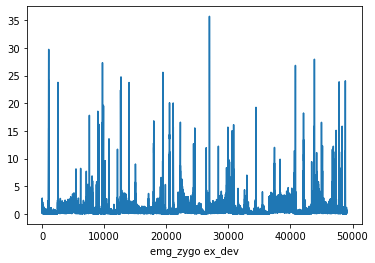

gsr valence
r = -0.249，p =  0.000
gsr arousal
r =  0.286，p =  0.000
gsr emo
r =  0.049，p =  0.000
emg_zygo valence
r =  0.004，p =  0.374
emg_zygo arousal
r =  0.032，p =  0.000
emg_zygo emo
r = -0.008，p =  0.079
emg_coru valence
r = -0.139，p =  0.000
emg_coru arousal
r =  0.113，p =  0.000
emg_coru emo
r =  0.141，p =  0.000
emg_trap valence
r = -0.047，p =  0.000
emg_trap arousal
r = -0.014，p =  0.002
emg_trap emo
r = -0.016，p =  0.000
bvp valence
r = -0.022，p =  0.000
bvp arousal
r = -0.015，p =  0.001
bvp emo
r = -0.029，p =  0.000


In [18]:
# the max-min
data_ex_dev = raw_data_grouped.max()-raw_data_grouped.min()
plt.plot(data_ex_dev["gsr"])
plt.xlabel("gsr ex_dev")
plt.show()
plt.plot(data_ex_dev["emg_zygo"])
plt.xlabel("emg_zygo ex_dev")
plt.show()

for phys_name in data_ex_dev.columns.values.tolist():
    for anno_name in anno_df.columns.values.tolist():
        x = data_ex_dev[phys_name]
        y = anno_df[anno_name]
        print(phys_name,anno_name)
        # pearson
        r,p = stats.pearsonr(x,y)  #
        print('r = %6.3f，p = %6.3f'%(r,p)) # if|r|<0.3 they are not linear correlated

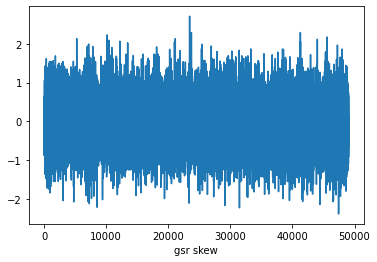

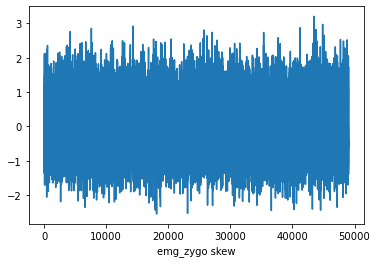

gsr valence
r = -0.013，p =  0.004
gsr arousal
r =  0.020，p =  0.000
gsr emo
r =  0.002，p =  0.727
emg_zygo valence
r = -0.013，p =  0.005
emg_zygo arousal
r =  0.019，p =  0.000
emg_zygo emo
r =  0.001，p =  0.816
emg_coru valence
r = -0.016，p =  0.001
emg_coru arousal
r =  0.012，p =  0.010
emg_coru emo
r =  0.016，p =  0.001
emg_trap valence
r =  0.004，p =  0.371
emg_trap arousal
r =  0.001，p =  0.775
emg_trap emo
r = -0.011，p =  0.018
bvp valence
r = -0.000，p =  0.939
bvp arousal
r =  0.003，p =  0.495
bvp emo
r =  0.012，p =  0.008


In [19]:
# the skew
data_skew = raw_data_grouped.skew()
plt.plot(data_skew["gsr"])
plt.xlabel("gsr skew")
plt.show()
plt.plot(data_skew["emg_zygo"])
plt.xlabel("emg_zygo skew")
plt.show()

for phys_name in data_skew.columns.values.tolist():
    for anno_name in anno_df.columns.values.tolist():
        x = data_skew[phys_name]
        y = anno_df[anno_name]
        print(phys_name,anno_name)
        # pearson
        r,p = stats.pearsonr(x,y)  #
        print('r = %6.3f，p = %6.3f'%(r,p)) # if|r|<0.3 they are not linear correlated

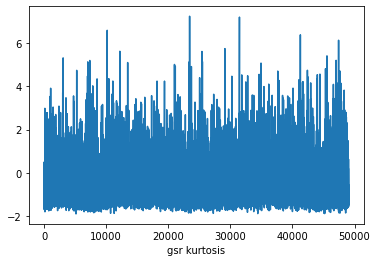

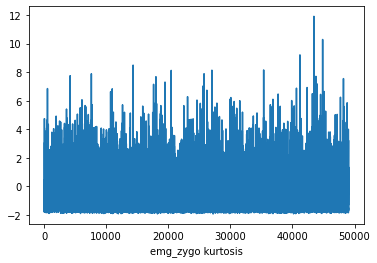

gsr valence
r =  0.075，p =  0.000
gsr arousal
r = -0.092，p =  0.000
gsr emo
r =  0.019，p =  0.000
emg_zygo valence
r = -0.012，p =  0.008
emg_zygo arousal
r =  0.009，p =  0.046
emg_zygo emo
r = -0.002，p =  0.694
emg_coru valence
r =  0.005，p =  0.317
emg_coru arousal
r = -0.001，p =  0.910
emg_coru emo
r = -0.002，p =  0.632
emg_trap valence
r = -0.016，p =  0.000
emg_trap arousal
r =  0.022，p =  0.000
emg_trap emo
r =  0.016，p =  0.001
bvp valence
r =  0.003，p =  0.490
bvp arousal
r =  0.008，p =  0.061
bvp emo
r =  0.006，p =  0.158


In [20]:
# the kurtosis
data_kurtosis = raw_data_grouped.apply(pd.DataFrame.kurt)
plt.plot(data_kurtosis["gsr"])
plt.xlabel("gsr kurtosis")
plt.show()
plt.plot(data_kurtosis["emg_zygo"])
plt.xlabel("emg_zygo kurtosis")
plt.show()
for phys_name in data_kurtosis.columns.values.tolist():
    for anno_name in anno_df.columns.values.tolist():
        x = data_kurtosis[phys_name]
        y = anno_df[anno_name]
        print(phys_name,anno_name)
        # pearson
        r,p = stats.pearsonr(x,y)  #
        print('r = %6.3f，p = %6.3f'%(r,p)) # if|r|<0.3 they are not linear correlated

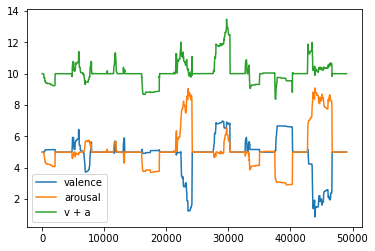

In [44]:
# valence: degree of being pleasant
plt.plot(anno_df["valence"],label='valence')

# arousal:degree of excitedness
plt.plot(anno_df["arousal"],label="arousal")

plt.plot(anno_df["valence"]+anno_df["arousal"],label="v + a")
plt.legend()

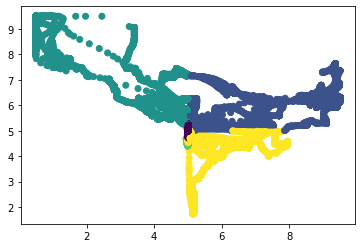

In [17]:
# valence: degree of being pleasant
plt.scatter(anno_df["valence"],anno_df["arousal"],c = anno_df["emo"])
plt.show()
# plt.legend()

# Feature Selection

In [21]:


concact_data = pd.concat([data_mean["gsr"],data_mean["emg_coru"],data_ex_dev["gsr"],data_ex_dev["emg_coru"],data_std["gsr"],data_std["emg_coru"],data_kurtosis['gsr'], data_skew['emg_coru'], data_skew['gsr'],data_kurtosis['emg_coru']],axis=1,keys=["gsr_mean","emg_coru_mean","gsr_ex_dev","emg_coru_ex_dev","gsr_std","emg_coru_std","gsr_kurt","emg_kurt","gsr_skew","emg_skew"])
X_raw = np.array(concact_data)
Y = np.array(anno_df["emo"])


In [22]:
# Feature selection
from sklearn.feature_selection import VarianceThreshold
sel=VarianceThreshold(1)
sel.fit(X_raw)   #获得方差，不需要y
X = sel.transform(X_raw)
print('Variances is %s'%sel.variances_)
print('After transform is \n%s'%X)
print('The surport is %s'%sel.get_support(True))#如果为True那么返回的是被选中的特征的下标
print('The surport is %s'%sel.get_support(False))#如果为FALSE那么返回的是布尔类型的列表，反应是否选中这列特征


# from sklearn.feature_selection import SelectKBest,f_classif
# print('before transform:\n',X_raw)
# sel=SelectKBest(score_func=f_classif,k=4)
# sel.fit(X_raw,Y)  #计算统计指标，这里一定用到y
# X = sel.transform(X_raw)
# print('scores_:\n',sel.scores_)
# print('pvalues_:',sel.pvalues_)
# print('selected index:',sel.get_support(True))
# print('after transform:\n',X)

Variances is [7.21985387e+01 6.02757369e+00 1.13529928e-04 2.28067957e+00
 1.06775003e-05 2.50504130e-01 5.11056409e-01 4.23490580e-01
 2.57280037e-01 9.39145143e-01]
After transform is 
[[24.94309972  7.8025897   0.17044641]
 [24.93388922  7.74192726  0.09825717]
 [24.9235645   8.07036064  0.47338965]
 ...
 [24.4231132   7.77449958  0.54281514]
 [24.41964851  7.55544956  0.3865273 ]
 [24.41969265  7.75186135  0.43002305]]
The surport is [0 1 3]
The surport is [ True  True False  True False False False False False False]


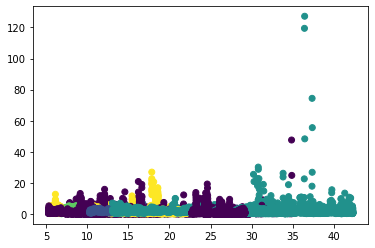

In [23]:
plt.scatter(X[:,0],X[:,2],c=Y)
plt.show()

# Classification

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree   
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Normalization

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
print(X_scaled)

[[ 0.79939143 -0.63648274 -0.65545179]
 [ 0.79830746 -0.66119136 -0.70325316]
 [ 0.79709235 -0.52741603 -0.45485262]
 ...
 [ 0.73819475 -0.64792422 -0.40888131]
 [ 0.73778699 -0.73714623 -0.51237005]
 [ 0.73779219 -0.65714507 -0.48356858]]


In [25]:
# split train set and test set
X_train, X_test, Y_train, Y_test =train_test_split(X_scaled, Y, test_size=0.2, shuffle=True)
print("X train size: {}, Y train size: {}".format(len(X_train), len(Y_train)))
print("X test size: {}, Y test size: {}".format(len(X_test), len(Y_test)))

X train size: 39225, Y train size: 39225
X test size: 9807, Y test size: 9807


In [26]:
# KNN

k = 15
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, Y_train)
# test
assess_model_socre=knn.score(X_test,Y_test)
print('Test set score for KNN n = {}:{:2f}'.format(k,assess_model_socre))

Test set score for KNN n = 15:0.782808


In [19]:
# parameter tuning-grid searcg

param_grid = [
    {
        "weights":["uniform"],
        "n_neighbors":[i for i in range(1,30)]
    },
    {
        "weights":["distance"],
        "n_neighbors":[i for i in range(1,30)],
        'p':[i for i in range(1,6)]
    }
     
]
knn_clf = KNeighborsClassifier()
knn_clf = GridSearchCV(knn_clf,param_grid=param_grid,cv=3)

knn_clf.fit(X_train,Y_train)

assess_model_socre=knn_clf.score(X_test,Y_test)
print('Test set score:{:2f}'.format(assess_model_socre))
knn_clf.best_estimator_ 
#p = 1 表示选择曼哈顿距离

#p = 2 表示选择欧拉距离（默认）

#p >=3 表示选择其他距离

Test set score:0.761497


KNeighborsClassifier(n_neighbors=10, p=1, weights='distance')

In [27]:
# Let's try decision tree


tree_clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=30,splitter="random",max_depth=15
                                  ,min_samples_leaf=10
                                  ,min_samples_split=10)                  
tree_clf = tree_clf.fit(X_train,Y_train)                              
result = tree_clf.score(X_test,Y_test) 
print("Decision tree:",result)

Decision tree: 0.7991230753543387


In [ ]:
# Try svc

svc_clf = SVC(kernel='poly') #rbf? poly?
svc_clf.fit(X_train, Y_train)
y_predict = svc_clf.predict(X_test)

# print (svc_clf.score(X_train, Y_train)) 
# print ('training set accuracy：', accuracy_score(Y_train, svc_clf.predict(X_train)))
# print (svc_clf.score(X_test, Y_test))
print ('test set accuracy：', accuracy_score(Y_test,y_predict)) # accuracy: linear - 0.50, rbf - 0.54 , poly - 0.52

In [38]:
grid = GridSearchCV(SVC(), param_grid={'kernel':['linear','rbf','poly'],'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}, cv=4)
grid.fit(X_train, Y_train)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10, 'gamma': 1, 'kernel': 'rbf'} with a score of 0.56


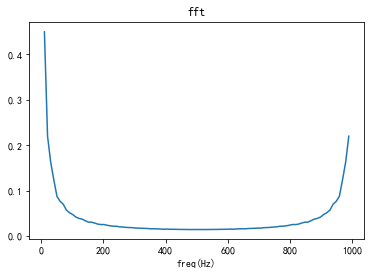

In [567]:
# Let's try frequency analysis with FFT
from scipy.fftpack import fft,ifft
import numpy as np
from matplotlib.pylab import mpl
y = data_mean["gsr"][100:200]
N = len(y)
fs = 1000
f = [fs/(N-1)*n for n in range(0,N)]

Y = np.fft.fft(y)*2/N #*2/N 反映了FFT变换的结果与实际信号幅值之间的关系
absY = [np.abs(x) for x in Y] #求傅里叶变换结果的模

plt.plot(f[1:-1],absY[1:-1])

plt.xlabel('freq(Hz)')

plt.title("fft")
plt.show()

In [590]:
import random
# for i,value in enumerate(data_mean["gsr"]):
#     if value == 0:
#         value = 0.0001
#     data_mean["gsr"][i] = 1/value
data_mean_normalized = normalize(data_mean)

In [607]:
N = len(data_mean["gsr"])
sample_num = 1000
indeces = random.sample(range(0,N),sample_num)
indeces.sort()
data_sampled = data_mean_normalized.iloc[indeces]
anno_sampled = anno_df.iloc[indeces]

# normailization

In [570]:
print(data_mean_normalized.iloc[indeces])

           gsr  emg_zygo  emg_coru  emg_trap       bvp
2     0.567173  0.058496  0.009362  0.093632  0.354308
5     0.605245  0.055500  0.005327  0.061304  0.289036
6     0.602793  0.068657  0.004489  0.047576  0.324532
9     0.595255  0.054385  0.006862  0.058484  0.523552
10    0.592270  0.070873  0.006861  0.046658  0.523827
...        ...       ...       ...       ...       ...
2434  0.239240  0.033592  0.000389  0.015737  0.415006
2438  0.234954  0.041225  0.003598  0.017276  0.494276
2443  0.229562  0.048419  0.004550  0.058497  0.479448
2444  0.228437  0.036107  0.002724  0.017609  0.456775
2445  0.227333  0.030198  0.000000  0.009490  0.503456

[1000 rows x 5 columns]


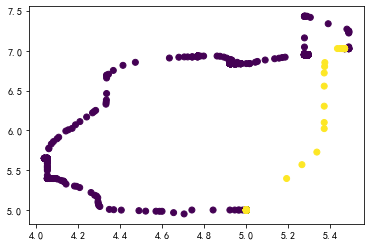

In [608]:
plt.scatter(anno_sampled["arousal"],anno_sampled["valence"],c =anno_sampled["video"] )

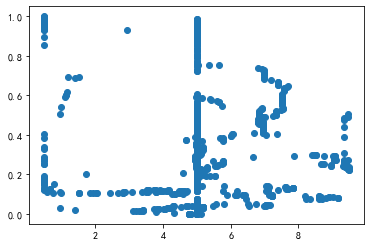

In [572]:
plt.scatter(anno_sampled["valence"],data_sampled["gsr"])

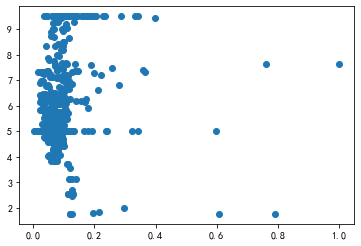

In [573]:
plt.scatter(data_sampled["emg_zygo"],anno_sampled["arousal"])

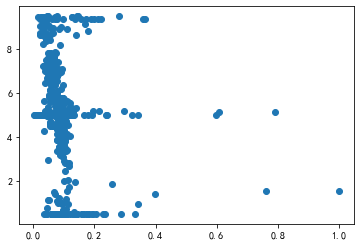

In [574]:
plt.scatter(data_sampled["emg_zygo"],anno_sampled["valence"])

In [438]:
import matplotlib.pyplot as mp, seaborn
# std
# data_anno = pd.concat([data_mean[["gsr","emg_coru"]],anno_df],axis=1)
# df_corr = data_anno.corr()
# seaborn.heatmap(df_corr,center = 0, annot = True, cmap = "YlGnBu")
# mp.show()

In [439]:

# # std
# data_anno = pd.concat([data_ex_dev[["gsr","emg_coru"]],anno_df],axis=1)
# df_corr = data_anno.corr()
# seaborn.heatmap(df_corr,center = 0, annot = True, cmap = "YlGnBu")
# mp.show()

In [440]:

# # std
# data_anno = pd.concat([data_std[["gsr","emg_coru"]],anno_df],axis=1)
# df_corr = data_anno.corr()
# seaborn.heatmap(df_corr,center = 0, annot = True, cmap = "YlGnBu")
# mp.show()

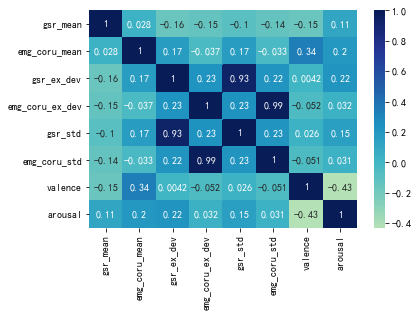

In [579]:
concact_data = pd.concat([data_mean["gsr"],data_mean["emg_coru"],data_ex_dev["gsr"],data_ex_dev["emg_coru"],data_std["gsr"],data_std["emg_coru"]],axis=1,keys=["gsr_mean","emg_coru_mean","gsr_ex_dev","emg_coru_ex_dev","gsr_std","emg_coru_std"])
data_anno = pd.concat([concact_data,anno_df],axis=1)
df_corr = data_anno.corr()
seaborn.heatmap(df_corr,center = 0, annot = True, cmap = "YlGnBu")
mp.show()

In [580]:
# let's try regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
def stdError_func(y_test, y):
  return np.sqrt(np.mean((y_test - y) ** 2))


def R2_1_func(y_test, y):
  return 1 - ((y_test - y) ** 2).sum() / ((y.mean() - y) ** 2).sum()


def R2_2_func(y_test, y):
  y_mean = np.array(y)
  y_mean[:] = y.mean()
  return 1 - stdError_func(y_test, y) / stdError_func(y_mean, y)

In [581]:
# multi-varialble linear fitting

x = np.array(concact_data.values)

y = np.array(anno_df["valence"].values)

cft = linear_model.LinearRegression()
print(x.shape)
cft.fit(x, y) #

print("model coefficients", cft.coef_)
print("model intercept", cft.intercept_)


predict_y =  cft.predict(x)
strError = stdError_func(predict_y, y)
R2_1 = R2_1_func(predict_y, y)
R2_2 = R2_2_func(predict_y, y)
score = cft.score(x, y) ##

print('strError={:.2f}, R2_1={:.2f},  R2_2={:.2f}, clf.score={:.2f}'.format(
    strError,R2_1,R2_2,score))

(2452, 6)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [444]:

poly_reg =PolynomialFeatures(degree=2) #三次多项式
X_ploy =poly_reg.fit_transform(x)
lin_reg_2=linear_model.LinearRegression()
lin_reg_2.fit(X_ploy,y)
predict_y =  lin_reg_2.predict(X_ploy)
strError = stdError_func(predict_y, y)
R2_1 = R2_1_func(predict_y, y)
R2_2 = R2_2_func(predict_y, y)
score = lin_reg_2.score(X_ploy, y) ##sklearn中自带的模型评估，与R2_1逻辑相同

print("coefficients", lin_reg_2.coef_)
print("intercept", lin_reg_2.intercept_)
print('degree={}: strError={:.2f}, R2_1={:.2f},  R2_2={:.2f}, clf.score={:.2f}'.format(
    3, strError,R2_1,R2_2,score))

coefficients [-3.23540118e-08  9.91023979e-01  2.65734594e-01 -1.61840118e+01
  1.60157624e-01 -3.02627516e+01 -8.29981264e-01 -5.86193511e-02
 -3.19420661e-03  1.63854320e+00 -9.03687687e-03 -7.67822216e-01
  3.45117141e-02 -1.09670197e-03  4.41403886e-01 -8.54612398e-05
 -8.21282541e-01 -4.34822580e-03  1.05273193e+01  1.07555591e-01
 -2.99404374e+02 -2.46310246e+00  5.28892628e-04  1.25888440e-01
 -1.14960839e-02  9.14319543e+02  5.59828492e+00  5.57213584e-02]
intercept 0.9527588964862117
degree=3: strError=1.43, R2_1=0.44,  R2_2=0.25, clf.score=0.44


In [522]:
# feature selection
from sklearn import feature_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, ShuffleSplit
import sys
X = np.array(concact_data)
Y = np.array(anno_df["valence"])
names =concact_data.columns.values.tolist()

rf = RandomForestRegressor(n_estimators=20, max_depth=4)
scores = []
for i in range(X.shape[1]):
     score = cross_val_score(rf, X[:, i:i+1], Y, scoring="r2",
                              cv=ShuffleSplit(len(X), 3, .3))
     scores.append((round(np.mean(score), 3), names[i]))
print(sorted(scores, reverse=True))


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=3, train_size=0.3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=3, train_size=0.3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=3, train_size=0.3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=3, train_size=0.3 as keyword args. 

[(-1425.626, 'emg_coru_ex_dev'), (-1463.77, 'emg_coru_mean'), (-2956.855, 'gsr_ex_dev'), (-6473.158, 'emg_coru_std'), (-9891.299, 'gsr_mean'), (-14146.352, 'gsr_std')]


In [523]:
from sklearn.model_selection import train_test_split
# split train set and test set X Y
X_train, X_test, Y_train, Y_test =train_test_split(XNew, Y, test_size=0.2, shuffle=True)
print("X train size: {}, Y train size: {}".format(len(X_train), len(Y_train)))
print("X test size: {}, Y test size: {}".format(len(X_test), len(Y_test)))


X train size: 980, Y train size: 980
X test size: 246, Y test size: 246


In [524]:
X_train.shape

(980, 4)

In [525]:
# try svm
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(X_train,Y_train)
svr_y_predict = svr.predict(X_test)

In [526]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("r2 score",r2_score(Y_test,svr_y_predict))

r2 score 0.15148021012973


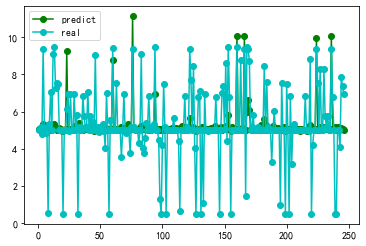

In [527]:
r = len(X_test) + 1
plt.plot(np.arange(1,r), svr_y_predict, 'go-', label="predict")
plt.plot(np.arange(1,r), Y_test, 'co-', label="real")
plt.legend()
plt.show()